##**IMPORT LIBRARIES**

In [1]:
import cv2
from tqdm import tqdm 
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from tensorflow.keras.applications import *
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [2]:
witdh = 224
height = 224
batch_size = 16
classes = 5

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**DATA**

##**BINARY CLASSES DATA**

In [ ]:
img_train_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/train/New_Option/Binary"

#model_dir = "/content/drive/MyDrive/Project_CV_IP/GF_model/GF_checkpoint.h5"
data_gen = ImageDataGenerator(validation_split= 0.1,
                              horizontal_flip = True,
                              vertical_flip = True
                              )
train_gen = data_gen.flow_from_directory(img_train_dir, 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "training",
                                         shuffle = True)                      
valid_gen = data_gen.flow_from_directory(img_train_dir, 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "validation",
                                         shuffle = True)      

Found 17882 images belonging to 2 classes.
Found 1986 images belonging to 2 classes.


##**FOUR CLASSES DATA**

In [ ]:
img_train_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/train/New_Option/FourClasses"

#model_dir = "/content/drive/MyDrive/Project_CV_IP/GF_model/GF_checkpoint.h5"
data_gen = ImageDataGenerator(validation_split= 0.1,
                              horizontal_flip = True,
                              vertical_flip = True
                              )
train_gen = data_gen.flow_from_directory(img_train_dir, 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "training",
                                         shuffle = True)                
      
valid_gen = data_gen.flow_from_directory(img_train_dir, 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "validation",
                                         shuffle = True)      

#**TRAIN**

##**BINARY MODEL**

In [ ]:
model_efficientNet = tf.keras.applications.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= (224,224,3))
avg_pool = GlobalAveragePooling2D()(model_efficientNet.output)
drop1 = Dropout(0.2)(avg_pool)
dn1 = Dense(512, activation= "relu")(drop1)
drop2 = Dropout(0.2)(dn1)
dn2 = Dense(2, activation= "softmax")(drop2)

In [ ]:
model = Model(inputs=model_efficientNet.input, outputs=dn2)
model.compile(optimizer=Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/EfficientNetB5_Winner_Binary_checkpoint.h5"

rd = ReduceLROnPlateau(monitor='val_loss', 
                       factor = 0.1, 
                       patience = 3, 
                       min_lr = 0.0000001) #giảm lr nếu ko cải thiện

es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   verbose = 1, 
                   patience=10) #dừng model nếu ko cải thiện
                   
hs = CSVLogger('/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/EfficientNetB5_Winner_Binary_final.csv', append = True)

mc = ModelCheckpoint(checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     save_best_only=True)

In [ ]:
model.fit(train_gen,
          validation_data= valid_gen,
          epochs = 100, 
          verbose = 1, 
          callbacks = [mc,es,hs,rd])

##**FOUR MODEL**

In [ ]:
model_efficientNet = tf.keras.applications.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= (224,224,3))
avg_pool = GlobalAveragePooling2D()(model_efficientNet.output)
drop1 = Dropout(0.2)(avg_pool)
dn1 = Dense(512, activation= "relu")(drop1)
drop2 = Dropout(0.2)(dn1)
dn2 = Dense(4, activation= "softmax")(drop2)

In [ ]:
model = Model(inputs=model_efficientNet.input, outputs=dn2)
model.compile(optimizer=Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/FourClasses/EfficientNetB5_Winner_FourClasses_checkpoint.h5"

rd = ReduceLROnPlateau(monitor='val_loss', 
                       factor = 0.1, 
                       patience = 3, 
                       min_lr = 0.0000001) #giảm lr nếu ko cải thiện

es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   verbose = 1, 
                   patience=10) #dừng model nếu ko cải thiện
                   
hs = CSVLogger('/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/FourClasses/EfficientNetB5_Winner_FourClasses_final.csv', append = True)

mc = ModelCheckpoint(checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     save_best_only=True)

In [ ]:
model.fit(train_gen,
          validation_data= valid_gen,
          epochs = 100, 
          verbose = 1, 
          callbacks = [mc,es,hs,rd])

#**EVALUATION**

In [ ]:
model_binary = tf.keras.models.load_model("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/BinaryImbalance/EfficientNetB5_Winner_Imbalance_Binary_checkpoint.h5")
model_four = tf.keras.models.load_model("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/FourClasses/EfficientNetB5_Winner_FourClasses_checkpoint.h5")

In [9]:
def predict_two_model(model_binary, model_four, threshold = 0.5):
  y_true = []
  y_pre = []
  for i in range(0,5):
    list_imgs = os.listdir("/content/drive/MyDrive/Project_CV_IP/DATA/test/Winner_croped_test/" + str(i))
    len_list = len(list_imgs)
    for j in trange(len_list):
      img_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/test/Winner_croped_test/" + str(i) +"/"+ list_imgs[j]
      img = image.load_img(img_dir, target_size= (224,224))
      x=image.img_to_array(img)
      x=np.expand_dims(x, axis=0)
      bn_predict = model_binary.predict(x)
      bn_predict = bn_predict > threshold
      bn_class = int(bn_predict[0][1] == True)
      if bn_class == 1:
        four_predict = model_four.predict(x)
        bn_class = np.argmax(four_predict) + 1
      y_true.append(i)
      y_pre.append(bn_class)
  return y_true, y_pre

In [19]:
def confusion_matrix(y_true, y_predict):
  matrix = np.array(tf.math.confusion_matrix(y_true, y_predict))

  df_cm = pd.DataFrame(matrix, 
                    index = [0,1,2,3,4] ,
                    columns = [0,1,2,3,4])
  plt.figure(figsize = (10,6))
  sn.heatmap(df_cm, annot=True, fmt= "d")

##**NON-THRESHOLD**

In [5]:
y_pres = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preiblfinal.npy")
print(y_pres)

[0 0 0 ... 4 4 4]


In [ ]:
y_true, y_pre = predict_two_model(model_binary, model_four)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preiblfinal.npy", y_pre)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueiblfinal.npy", y_true)

In [7]:
y_pre = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preiblfinal.npy")
y_true = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueiblfinal.npy")

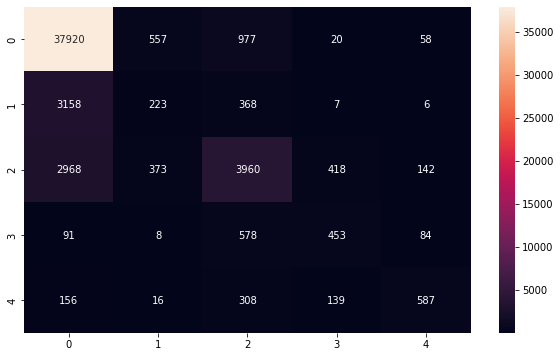

In [20]:
confusion_matrix(y_true, y_pre)

In [12]:
print("Kappa score: ", cohen_kappa_score(y_true,y_pre,weights= "quadratic"))
print("Accuracy score: ", accuracy_score(y_true, y_pre))

Kappa score:  0.6939606449160043
Accuracy score:  0.8089220718618759


##**0.4-THRESHOLD**

In [ ]:
y_true, y_pre = predict_two_model(model_binary, model_four)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preibl04final.npy", y_pre)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueibl04final.npy", y_true)

In [16]:
y_pre = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preibl04final.npy")
y_true = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueibl04final.npy")

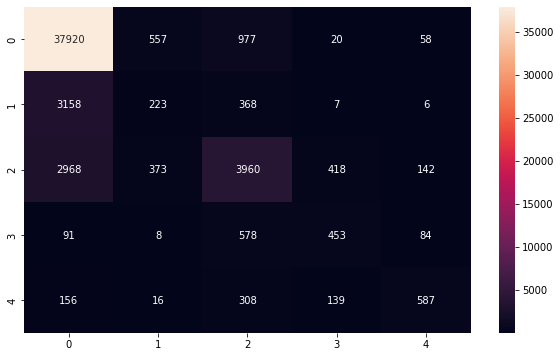

In [21]:
confusion_matrix(y_true, y_pre)

In [18]:
print("Kappa score: ", cohen_kappa_score(y_true,y_pre,weights= "quadratic"))
print("Accuracy score: ", accuracy_score(y_true, y_pre))

Kappa score:  0.7017943996101874
Accuracy score:  0.8052823145123659


##**0.3-THRESHOLD**

In [ ]:
y_true, y_pre = predict_two_model(model_binary, model_four)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preibl03final.npy", y_pre)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueibl03final.npy", y_true)

In [22]:
y_pre = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/preibl03final.npy")
y_true = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/New Option/Summary/trueibl03final.npy")

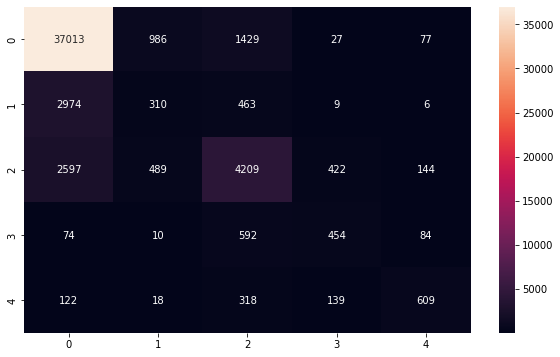

In [23]:
confusion_matrix(y_true, y_pre)

In [24]:
print("Kappa score: ", cohen_kappa_score(y_true,y_pre,weights= "quadratic"))
print("Accuracy score: ", accuracy_score(y_true, y_pre))

Kappa score:  0.7026894499287824
Accuracy score:  0.7950536630891274
